In [28]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
import matplotlib.pyplot as plt

In [29]:
from sklearn.cluster import KMeans

In [50]:
wine_df = datasets.load_wine()

In [31]:
model = KMeans(n_clusters=3)

In [32]:
model.fit(wine_df.data)

KMeans(n_clusters=3)

In [33]:
predictions = model.predict(wine_df.data)

In [34]:
print(predictions)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 0 1 0 0 1 1 1 0 0 2
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0]


In [35]:
cluster_0 = wine_df.data[predictions == 0]
cluster_1 = wine_df.data[predictions == 1]
cluster_2 = wine_df.data[predictions == 2]

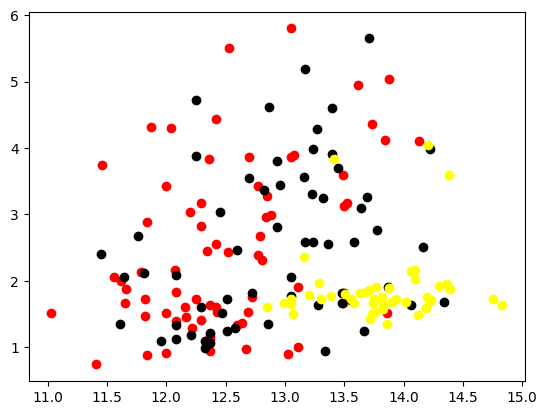

In [36]:
plt.scatter(cluster_0[:,0] , cluster_0[:,1] , color = 'red')
plt.scatter(cluster_1[:,0] , cluster_1[:,1] , color = 'black')
plt.scatter(cluster_2[:,0] , cluster_2[:,1] , color = 'yellow')

In [37]:
cluster_0

array([[1.237000e+01, 9.400000e-01, 1.360000e+00, 1.060000e+01,
        8.800000e+01, 1.980000e+00, 5.700000e-01, 2.800000e-01,
        4.200000e-01, 1.950000e+00, 1.050000e+00, 1.820000e+00,
        5.200000e+02],
       [1.264000e+01, 1.360000e+00, 2.020000e+00, 1.680000e+01,
        1.000000e+02, 2.020000e+00, 1.410000e+00, 5.300000e-01,
        6.200000e-01, 5.750000e+00, 9.800000e-01, 1.590000e+00,
        4.500000e+02],
       [1.237000e+01, 1.130000e+00, 2.160000e+00, 1.900000e+01,
        8.700000e+01, 3.500000e+00, 3.100000e+00, 1.900000e-01,
        1.870000e+00, 4.450000e+00, 1.220000e+00, 2.870000e+00,
        4.200000e+02],
       [1.217000e+01, 1.450000e+00, 2.530000e+00, 1.900000e+01,
        1.040000e+02, 1.890000e+00, 1.750000e+00, 4.500000e-01,
        1.030000e+00, 2.950000e+00, 1.450000e+00, 2.230000e+00,
        3.550000e+02],
       [1.311000e+01, 1.010000e+00, 1.700000e+00, 1.500000e+01,
        7.800000e+01, 2.980000e+00, 3.180000e+00, 2.600000e-01,
        2.28

In [38]:
cluster_0[:,0]

array([12.37, 12.64, 12.37, 12.17, 13.11, 12.37, 13.86, 13.49, 11.66,
       13.03, 11.84, 12.7 , 12.  , 13.05, 11.84, 12.67, 12.16, 11.65,
       12.08, 12.  , 12.69, 12.29, 11.62, 12.29, 12.29, 12.6 , 12.34,
       11.82, 12.42, 12.25, 12.72, 12.22, 11.46, 12.52, 11.41, 12.08,
       11.03, 11.82, 12.42, 12.77, 12.  , 11.56, 12.42, 13.05, 11.87,
       12.07, 12.43, 11.79, 12.37, 12.04, 12.88, 12.81, 12.53, 13.49,
       12.84, 13.52, 13.62, 13.88, 13.08, 13.5 , 12.79, 13.11, 13.84,
       12.36, 12.85, 13.73, 12.2 , 12.77, 14.13])

In [39]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [40]:
dbscan = DBSCAN(eps=0.4, min_samples=4)

In [41]:
dbscan.fit(wine_df.data)

DBSCAN(eps=0.4, min_samples=4)

In [42]:
pca = PCA(n_components=2).fit(wine_df.data)
pca_2d = pca.transform(wine_df.data)

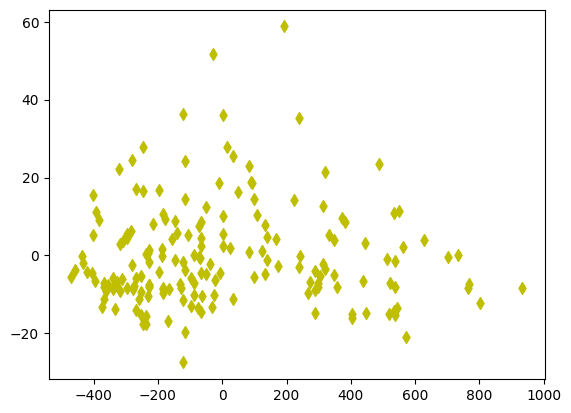

In [43]:
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 2:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='d')

In [44]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [45]:
mergings = linkage(wine_df.data, method = 'complete')

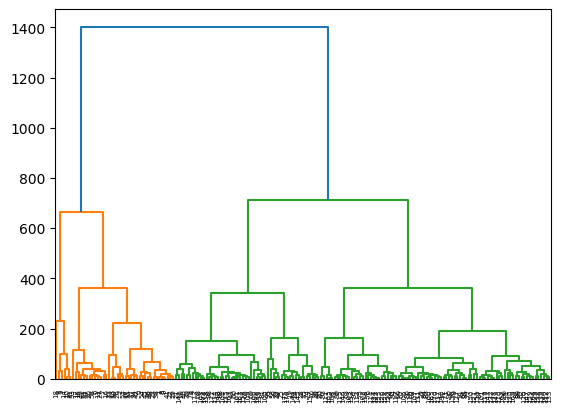

In [46]:
clusters = dendrogram(mergings,leaf_rotation=90)